# calculation of diffraction losses from Fresnel equations

In [285]:
import pandas as pd
import numpy as np
import matplotlib as plt
import math as math
import scipy.integrate as sci
from scipy.integrate import quad
import cmath

## making a list containing all possible heights of transmitter and receiver

In [286]:
revceiver_transmitter_height = []
for i in range(10000):
    revceiver_transmitter_height.append(i)

## creating a data frame

In [287]:
fresnelLoses = pd.DataFrame({'height of receiver and transmitter': revceiver_transmitter_height})

## function which will count diffraction parameter

In [288]:
# r_t_h is height of receiver and transmitter
def counting_v(r_t_h, d1, d2, building_height = 30):
    f = 900 * (10 ** 6)
    h = building_height - r_t_h
    c = 299792458  # wave speed in vacuum
    wavelength = c / f
    v = 2*(d1 + d2)
    v = v / (wavelength * d1 * d2)
    v = h * math.sqrt(v)
    if (v > 3 or v < -5):
        return np.nan
    return v

## adding diffraction parameter to frame

In [289]:
fresnelLoses['v'] = fresnelLoses.apply(lambda row: counting_v(row['height of receiver and transmitter'],
                                                              d1=1000,
                                                              d2=300,),
                                       axis=1)

## deleting all values becouse of which v is higher than 3 or lower than -5

In [290]:
fresnelLoses.dropna(inplace = True)

## funtion to calculate diffraction lossess

In [291]:
def diflosscos(t):
    return math.cos((math.pi/2) * (t**2))

def diflosssin(t):
    return math.sin((math.pi/2) * (t**2))

In [292]:
def difloss(v):
    c, _ = quad(diflosscos, 0, v) # calka c(u) czyli cos (pod calka od 0 do v)
    s, _ = quad(diflosssin, 0, v)
    loss = ((1+1j)/2)*(((1/2)-c)-1j*((1/2) - s)) #sci.quad(diflossintegral, v, np.inf)
    return abs(loss)

## calculating final result

In [293]:
def final_result_in_db(w):
    return 20 * math.log10(w)

## calculating diffraction lossess

In [294]:
# fresnelLoses['diffraction losses [dB]'] = fresnelLoses['v1'].apply(difloss)
fresnelLoses['attenuation factor'] = fresnelLoses['v'].apply(difloss)
fresnelLoses['diffraction losses [dB]'] = fresnelLoses['attenuation factor'].apply(final_result_in_db)

## result

In [295]:
fresnelLoses = fresnelLoses.reset_index(drop=True)

In [296]:
fresnelLoses

,height of receiver and transmitter,v,attenuation factor,diffraction losses [dB]
0,12,2.903417,0.077259,-22.241074
1,13,2.742116,0.081735,-21.751817
2,14,2.580815,0.086749,-21.234715
3,15,2.419514,0.092398,-20.686743
4,16,2.258213,0.098805,-20.104460
5,17,2.096912,0.106121,-19.483960
6,18,1.935612,0.114540,-18.820847
7,19,1.774311,0.124305,-18.110227
8,20,1.613010,0.135726,-17.346755
9,21,1.451709,0.149198,-16.524761


## plot of |w(v)|

<Axes: xlabel='v'>

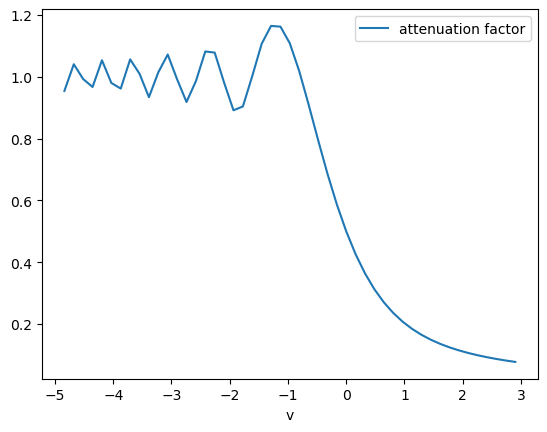

In [297]:
fresnelLoses.plot(x = 'v',y = 'attenuation factor', kind = 'line')

<Axes: xlabel='v'>

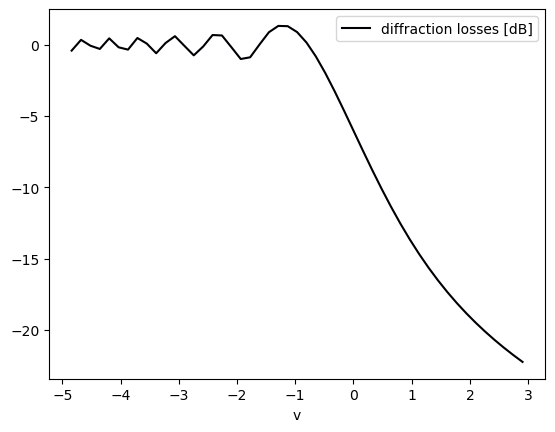

In [298]:
fresnelLoses.plot(x = 'v',y = 'diffraction losses [dB]' , kind = 'line', colormap = 'inferno')

<Axes: xlabel='v'>

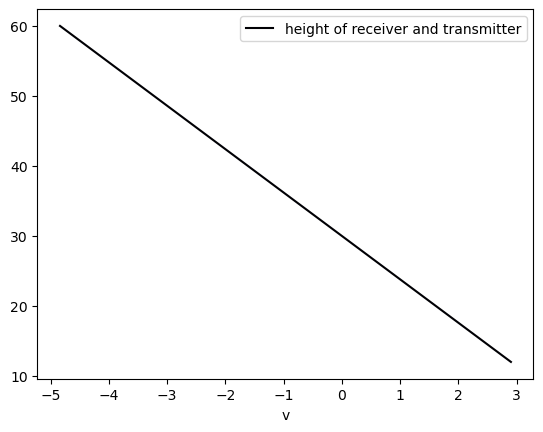

In [255]:
fresnelLoses.plot(x = 'v',y = 'height of receiver and transmitter' , kind = 'line', colormap = 'inferno')